In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, style='whitegrid', palette='Set2')
%matplotlib inline

from copy import deepcopy
from tqdm import tqdm

In [18]:
def make_hist_plot(from_filename, to_filename, xlabel, ylabel, title, sep=','):
    with open(from_filename) as f:
        data = ''.join(f.readlines())
    data = data.split(',')
    data = [float(x) for x in data]
    fig = plt.figure(figsize=(12, 8))
    plt.hist(data, bins=20, density=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig.savefig(to_filename)

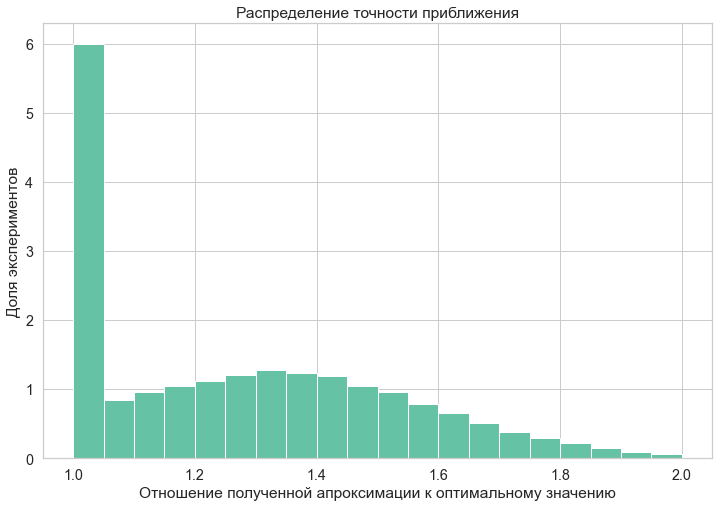

In [19]:
make_hist_plot('results/diffs.txt', 'plots/diffs.png', 'Отношение полученной апроксимации к оптимальному значению',
               'Доля экспериментов', 'Распределение точности приближения')

In [25]:
def read_data(filename):
    with open(filename) as f:
        data = f.readlines()
    return data

In [61]:
time_data = read_data('results/times.txt')
time_data = np.array([[float(x) for x in s.split()] for s in time_data])

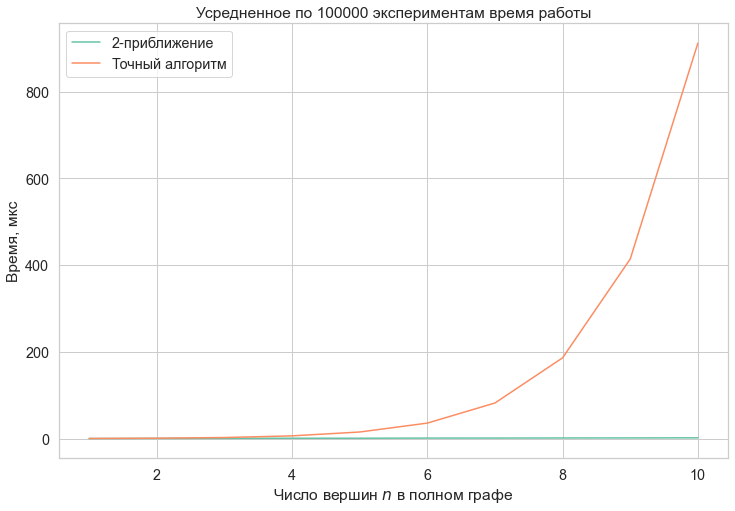

In [62]:
experiments_number = 100000

fig = plt.figure(figsize=(12, 8))

time_approx = time_data[time_data[:,0] == 0]
plt.plot(time_approx[:, 1], time_approx[:, 2], label='2-приближение')

time_exact = time_data[time_data[:,0] == 1]
plt.plot(time_exact[:, 1], time_exact[:, 2], label='Точный алгоритм')

plt.title(f'Усредненное по {experiments_number} экспериментам время работы')
plt.xlabel('Число вершин $n$ в полном графе')
plt.ylabel('Время, мкс')
plt.legend()
fig.savefig('plots/times.png')

In [63]:
time_data2 = read_data('results/approx_times.txt')
time_data2 = np.array([[float(x) for x in s.split()] for s in time_data2])

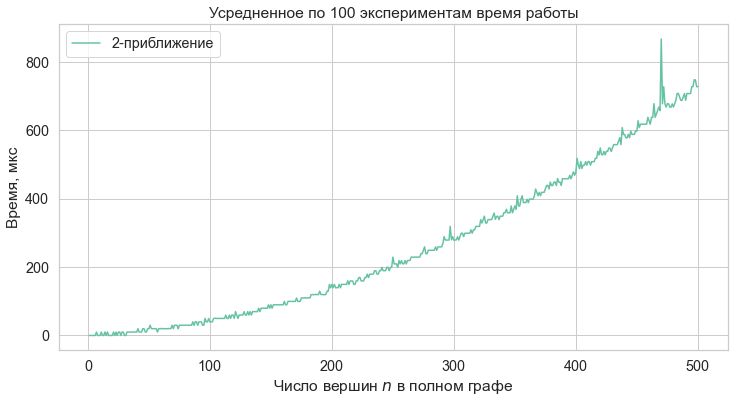

In [64]:
experiments_number = 100

fig = plt.figure(figsize=(12, 6))

time_approx = time_data2[time_data2[:,0] == 0]
plt.plot(time_approx[:, 1], time_approx[:, 2], label='2-приближение')

plt.title(f'Усредненное по {experiments_number} экспериментам время работы')
plt.xlabel('Число вершин $n$ в полном графе')
plt.ylabel('Время, мкс')
plt.legend()
fig.savefig('plots/approx_times.png')

1.7969119245911198 -4.588428408405666


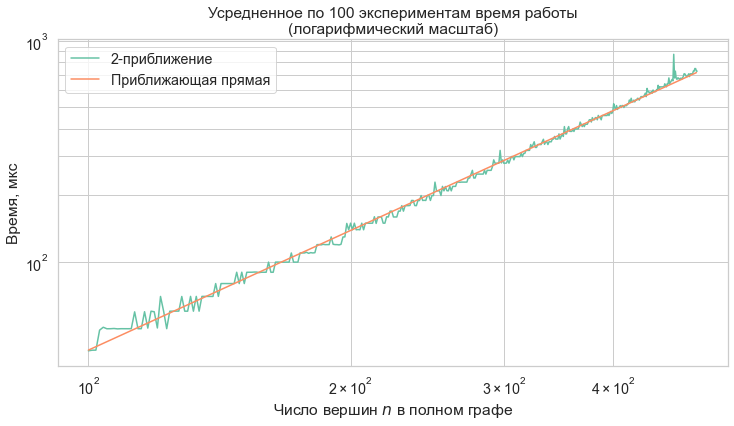

In [65]:
experiments_number = 100

fig = plt.figure(figsize=(12, 6))

time_data2_cut = time_data2[time_data2[:, 1] >=100]
time_approx = time_data2_cut[time_data2_cut[:,0] == 0]
plt.plot(time_approx[:, 1], time_approx[:, 2], label='2-приближение')

plt.title(f'Усредненное по {experiments_number} экспериментам время работы\n(логарифмический масштаб)')
plt.xlabel('Число вершин $n$ в полном графе')
plt.ylabel('Время, мкс')
plt.xscale('log')
plt.yscale('log')

a, b = np.polyfit(np.log(time_approx[:, 1]), np.log(time_approx[:, 2]), 1)
print(a, b)
x_grid = np.arange(100, 500, 1)
y_grid = x_grid ** a * np.exp(b)
plt.plot(x_grid, y_grid, label='Приближающая прямая')

plt.yticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.xticks([100, 200, 300, 400])
plt.grid(b=True)
plt.legend()
fig.savefig('plots/approx_times_log.png')